In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import scipy.stats as st

In [2]:
weather=pd.read_csv('C:\\Users\\xuebi\\Desktop\\Jupyter nootbook\\Summer 2017 REU\\gsom_seasonal.csv')
seasonal_tracts=pd.read_csv('C:\\Users\\xuebi\\Desktop\\Jupyter nootbook\\Summer 2017 REU\\seasonal_by_tract.csv')
station=pd.read_csv('C:\\Users\\xuebi\\Desktop\\Jupyter nootbook\\Summer 2017 REU\\tracts_with_nearest_stations.csv')


In [3]:
weather['date'] = pd.to_datetime(weather['date'])
weather.head()

date datatype  LA GUARDIA AIRPORT, NY US  NY CITY CENTRAL PARK, NY US  \
0 2003-12-01     AWND                        5.8                         3.75   
1 2003-12-01     EMNT                      -12.8                       -13.30   
2 2003-12-01     EMSD                      216.0                       241.50   
3 2003-12-01     EMSN                       72.5                        85.00   
4 2003-12-01     EMXP                       26.3                        27.30   

   JFK INTERNATIONAL AIRPORT, NY US  
0                              6.10  
1                            -13.60  
2                            177.50  
3                             52.50  
4                             24.65

In [4]:
seasonal_tracts['date'] = pd.to_datetime(seasonal_tracts['created_date'])
seasonal_tracts.head()

complaint_type created_date  1000100  1000201  1000202  1000500  \
0  Street Light Condition    12/1/2003      NaN      NaN      NaN      NaN   
1           Water Quality    12/1/2003      NaN      NaN      NaN      NaN   
2                Plumbing    12/1/2003      NaN      NaN      1.0      NaN   
3              Electrical    12/1/2003      NaN      NaN      NaN      NaN   
4        Dirty Conditions    12/1/2003      NaN      NaN      NaN      NaN   

   1000600  1000700  1000800  1000900    ...      5027900  5029102  5029103  \
0      NaN      NaN      NaN      NaN    ...          NaN      NaN      NaN   
1      NaN      NaN      NaN      NaN    ...          NaN      NaN      NaN   
2      NaN      NaN      NaN      NaN    ...          NaN      NaN      NaN   
3      NaN      2.0      NaN      NaN    ...          NaN      NaN      NaN   
4      NaN      NaN      NaN      NaN    ...          NaN      NaN      NaN   

   5029104  5030301  5030302  5031901  5031902  5032300       date  
0      NaN      NaN      NaN      NaN      NaN      NaN 2003-12-01  
1      NaN      NaN      NaN      NaN      NaN      NaN 2003-12-01  
2      1.0      NaN      NaN      NaN      NaN      NaN 2003-12-01  
3      NaN      NaN      NaN      NaN      1.0      NaN 2003-12-01  
4      NaN      NaN      NaN      NaN      NaN      NaN 2003-12-01  

[5 rows x 2166 columns]

In [5]:
station.head(2)

boro_ct201      boro_name  ct2010 ntacode  \
0     5000900  Staten Island     900    SI22   
1     1009800      Manhattan    9800    MN19   

                                     ntaname                      station  
0  West New Brighton-New Brighton-St. George  NY CITY CENTRAL PARK, NY US  
1                    Turtle Bay-East Midtown  NY CITY CENTRAL PARK, NY US

In [6]:
lut = dict(zip(station['boro_ct201'].astype(str), station['station']))
lut
#creating a dict merging the boro_ct201 and the nearest weather station 


{'5000900': 'NY CITY CENTRAL PARK, NY US',
 '1009800': 'NY CITY CENTRAL PARK, NY US',
 '1010000': 'NY CITY CENTRAL PARK, NY US',
 '1010200': 'NY CITY CENTRAL PARK, NY US',
 '1010400': 'NY CITY CENTRAL PARK, NY US',
 '1011300': 'NY CITY CENTRAL PARK, NY US',
 '1011402': 'NY CITY CENTRAL PARK, NY US',
 '1013000': 'NY CITY CENTRAL PARK, NY US',
 '1014000': 'NY CITY CENTRAL PARK, NY US',
 '1014801': 'NY CITY CENTRAL PARK, NY US',
 '1015300': 'NY CITY CENTRAL PARK, NY US',
 '1015400': 'NY CITY CENTRAL PARK, NY US',
 '1018400': 'NY CITY CENTRAL PARK, NY US',
 '1019000': 'NY CITY CENTRAL PARK, NY US',
 '1020102': 'NY CITY CENTRAL PARK, NY US',
 '1020600': 'NY CITY CENTRAL PARK, NY US',
 '1024900': 'NY CITY CENTRAL PARK, NY US',
 '1025300': 'NY CITY CENTRAL PARK, NY US',
 '1025700': 'NY CITY CENTRAL PARK, NY US',
 '1026100': 'NY CITY CENTRAL PARK, NY US',
 '1026300': 'NY CITY CENTRAL PARK, NY US',
 '1026700': 'NY CITY CENTRAL PARK, NY US',
 '1026900': 'NY CITY CENTRAL PARK, NY US',
 '1027700':

In [7]:
sewer = seasonal_tracts[seasonal_tracts['complaint_type'].str.match("Sewer")]
sewer.head()
#getting sewer dataframe out of seasonal_tract

complaint_type created_date  1000100  1000201  1000202  1000500  1000600  \
5           Sewer    12/1/2003      NaN      NaN      NaN      NaN      NaN   
30          Sewer     3/1/2004      NaN      NaN      NaN      NaN      7.0   
46          Sewer     6/1/2004      NaN      3.0      5.0      NaN      2.0   
72          Sewer     9/1/2004      NaN      1.0      1.0      NaN      6.0   
98          Sewer    12/1/2004      NaN      NaN      2.0      NaN      2.0   

    1000700  1000800  1000900    ...      5027900  5029102  5029103  5029104  \
5       NaN      NaN      NaN    ...          NaN      NaN      NaN      NaN   
30      9.0     15.0     10.0    ...          3.0     20.0     29.0     28.0   
46     15.0     10.0     18.0    ...         18.0     28.0     30.0     18.0   
72     13.0      4.0     21.0    ...          4.0     19.0     12.0     22.0   
98      3.0      6.0     14.0    ...         14.0     30.0     31.0     26.0   

    5030301  5030302  5031901  5031902  5032300       date  
5       NaN      NaN      NaN      NaN      NaN 2003-12-01  
30     12.0      7.0      3.0     16.0      5.0 2004-03-01  
46     15.0     17.0      3.0     16.0      3.0 2004-06-01  
72     25.0     13.0      4.0     12.0     12.0 2004-09-01  
98     10.0      5.0      3.0     17.0      3.0 2004-12-01  

[5 rows x 2166 columns]

In [8]:
rain = weather[weather['datatype'].str.match("PRCP")]
rain.head()
#getting rain(PRCP) out of weather 

date datatype  LA GUARDIA AIRPORT, NY US  \
6  2003-12-01     PRCP                  57.350000   
17 2004-03-01     PRCP                 103.333333   
28 2004-06-01     PRCP                 131.400000   
39 2004-09-01     PRCP                 128.233333   
50 2004-12-01     PRCP                  85.833333   

    NY CITY CENTRAL PARK, NY US  JFK INTERNATIONAL AIRPORT, NY US  
6                     61.150000                         52.650000  
17                   108.900000                        110.700000  
28                   115.766667                        144.200000  
39                   142.900000                        112.000000  
50                    96.733333                         79.866667

In [9]:
tract_list = sewer.columns[~sewer.columns.isin(["created_date", "complaint_type", "date"])]
tract_list
#getting each individual tract out 

Index(['1000100', '1000201', '1000202', '1000500', '1000600', '1000700',
       '1000800', '1000900', '1001001', '1001002',
       ...
       '5027706', '5027900', '5029102', '5029103', '5029104', '5030301',
       '5030302', '5031901', '5031902', '5032300'],
      dtype='object', length=2163)

In [10]:
sewer.head()

complaint_type created_date  1000100  1000201  1000202  1000500  1000600  \
5           Sewer    12/1/2003      NaN      NaN      NaN      NaN      NaN   
30          Sewer     3/1/2004      NaN      NaN      NaN      NaN      7.0   
46          Sewer     6/1/2004      NaN      3.0      5.0      NaN      2.0   
72          Sewer     9/1/2004      NaN      1.0      1.0      NaN      6.0   
98          Sewer    12/1/2004      NaN      NaN      2.0      NaN      2.0   

    1000700  1000800  1000900    ...      5027900  5029102  5029103  5029104  \
5       NaN      NaN      NaN    ...          NaN      NaN      NaN      NaN   
30      9.0     15.0     10.0    ...          3.0     20.0     29.0     28.0   
46     15.0     10.0     18.0    ...         18.0     28.0     30.0     18.0   
72     13.0      4.0     21.0    ...          4.0     19.0     12.0     22.0   
98      3.0      6.0     14.0    ...         14.0     30.0     31.0     26.0   

    5030301  5030302  5031901  5031902  5032300       date  
5       NaN      NaN      NaN      NaN      NaN 2003-12-01  
30     12.0      7.0      3.0     16.0      5.0 2004-03-01  
46     15.0     17.0      3.0     16.0      3.0 2004-06-01  
72     25.0     13.0      4.0     12.0     12.0 2004-09-01  
98     10.0      5.0      3.0     17.0      3.0 2004-12-01  

[5 rows x 2166 columns]

In [11]:
corr = dict()
for tract in tract_list:
    nearest_st = lut[tract]
    corr_df = sewer[['date', tract]].merge(rain[['date', nearest_st]], 
                                                left_on = "date", right_on="date")
    corr[tract]= corr_df[tract].corr(corr_df[nearest_st])

# nearest_st=lut[tract] using the lut dict to get the nearest station 
# corr_df is merging sewer and rain data 
#so we will have the data of the tract and the data of the station 

In [12]:
corrdf=pd.Series(corr).to_frame()
corrdf.head()
#making corr into a dataframe

0
1000100       NaN
1000201 -0.260633
1000202  0.320705
1000500       NaN
1000600  0.299029

In [13]:
corrdf.index
#making sure the index macth with the gdf 

Index(['1000100', '1000201', '1000202', '1000500', '1000600', '1000700',
       '1000800', '1000900', '1001001', '1001002',
       ...
       '5027706', '5027900', '5029102', '5029103', '5029104', '5030301',
       '5030302', '5031901', '5031902', '5032300'],
      dtype='object', length=2163)

In [14]:
import geopandas as gpd
shpfile = 'C:\\Users\\xuebi\\Desktop\\census_tracts\\census_tracts\\census2010.shp'
coord_system = {'init': 'epsg:4326'}#tells how the earth exist 
gdf = gpd.GeoDataFrame.from_file(shpfile, crs=coord_system)

In [15]:
tracts=gdf[['boro_ct201','geometry']].merge(corrdf,
                   left_on='boro_ct201',right_index=True)
tracts.head()

boro_ct201                                           geometry         0
0    5000900  POLYGON ((-74.07920577013245 40.64343078374567...  0.317281
1    1009800  POLYGON ((-73.96432543478758 40.75638153099091...  0.384491
2    1010000  POLYGON ((-73.96802436915851 40.75957814005282...  0.249639
3    1010200  POLYGON ((-73.97124277307127 40.76093641847906...  0.161042
4    1010400  POLYGON ((-73.97445730550224 40.76229308352487...  0.212436

In [16]:
tracts=tracts.rename(columns={0:'correlation'})

In [17]:
sc = gdf[['boro_ct201','geometry']].merge(sewer.count().to_frame(),
                   left_on='boro_ct201',right_index=True)
sc=sc.rename(columns={0:'count'})
sc.head()

boro_ct201                                           geometry  count
0    5000900  POLYGON ((-74.07920577013245 40.64343078374567...     52
1    1009800  POLYGON ((-73.96432543478758 40.75638153099091...     54
2    1010000  POLYGON ((-73.96802436915851 40.75957814005282...     52
3    1010200  POLYGON ((-73.97124277307127 40.76093641847906...     53
4    1010400  POLYGON ((-73.97445730550224 40.76229308352487...     54

In [18]:
sc["rate"] = sc['count']/sc['count'].max()

In [19]:
sc.head()

boro_ct201                                           geometry  count  \
0    5000900  POLYGON ((-74.07920577013245 40.64343078374567...     52   
1    1009800  POLYGON ((-73.96432543478758 40.75638153099091...     54   
2    1010000  POLYGON ((-73.96802436915851 40.75957814005282...     52   
3    1010200  POLYGON ((-73.97124277307127 40.76093641847906...     53   
4    1010400  POLYGON ((-73.97445730550224 40.76229308352487...     54   

       rate  
0  0.945455  
1  0.981818  
2  0.945455  
3  0.963636  
4  0.981818

In [20]:
sewer1= tracts.merge(sc[["boro_ct201", "rate",'count']], right_on='boro_ct201', left_on="boro_ct201")
sewer1.head()

boro_ct201                                           geometry  correlation  \
0    5000900  POLYGON ((-74.07920577013245 40.64343078374567...     0.317281   
1    1009800  POLYGON ((-73.96432543478758 40.75638153099091...     0.384491   
2    1010000  POLYGON ((-73.96802436915851 40.75957814005282...     0.249639   
3    1010200  POLYGON ((-73.97124277307127 40.76093641847906...     0.161042   
4    1010400  POLYGON ((-73.97445730550224 40.76229308352487...     0.212436   

       rate  count  
0  0.945455     52  
1  0.981818     54  
2  0.945455     52  
3  0.963636     53  
4  0.981818     54

In [21]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as mcm
import matplotlib.ticker as mticker
%matplotlib inline

In [46]:
%matplotlib inline
Staten_island1=['5011402','5012200','5013400','5011202','5012804'
               ,'5011201','5011401','5009602','5009601','5007000']
cmap=mcm.PiYG
norm=mcolors.Normalize(vmin=-1,vmax=1)
subplot_kw = dict(projection=ccrs.PlateCarree())
fig, ax = plt.subplots(figsize=(15, 15),
                       subplot_kw=subplot_kw)
ax.background_patch.set_visible(False)
#get bounding box for city
#[-73.700272, -74.2590, 40.477399, 40.917577]
ax.set_extent([-73.69, -74.26, 40.477395, 40.92], 
              ccrs.Geodetic())
ax.set_title(f"Correlation Between Weather Station and 311 Sewer Complaints")
for _, row in sewer1.iterrows():
    if row['rate']<.75:
        color="white"
    else:
        color = cmap(norm(row["correlation"]))
    if row['boro_ct201']==Staten_island1:
        ax.add_geometries([row['geometry']], subplot_kw['projection'],
                          facecolor=color, edgecolor='y')
    else:
        ax.add_geometries([row['geometry']], subplot_kw['projection'],
                          facecolor=color, edgecolor='lightgrey')
    
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm._A = []
cb = fig.colorbar(sm, ax=ax, fraction=.045, pad=.05, aspect=15)
cb.ax.tick_params(labelsize=14)
cb.set_label("Correlations" , fontsize=16)
fig.savefig('Correlation Between Weather Station and 311 Sewer Complaints')

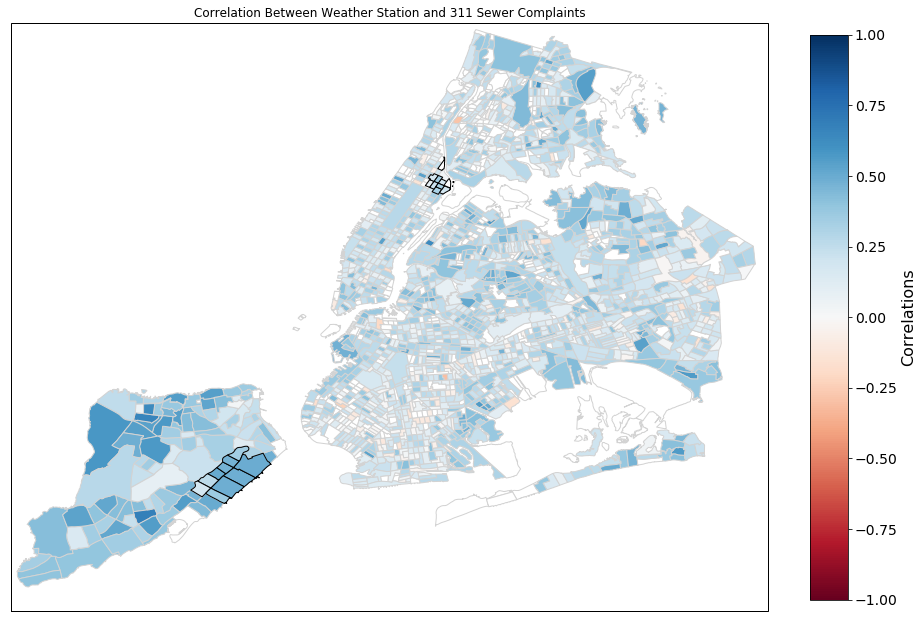

In [81]:
Staten_island1=['5011402','5012200','5013400','5011202','5012804'
               ,'5011201','5011401','5009602','5009601','5007000']
east_harlem=['1018400','1019800','1019600','1019400','1018000','1018200',
             '1017800','1018800','1021000','1019200']

cmap=mcm.RdBu
norm=mcolors.Normalize(vmin=-1,vmax=1)
subplot_kw = dict(projection=ccrs.PlateCarree())
fig, ax = plt.subplots(figsize=(15, 15),
                       subplot_kw=subplot_kw)
ax.background_patch.set_visible(False)
#get bounding box for city
#[-73.700272, -74.2590, 40.477399, 40.917577]
ax.set_extent([-73.69, -74.26, 40.477395, 40.92], 
              ccrs.Geodetic())
ax.set_title(f"Correlation Between Weather Station and 311 Sewer Complaints")
for _, row in sewer1.iterrows():
    if row['rate']<.75:
        color="white"
    else:
        color = cmap(norm(row["correlation"]))
    if row['boro_ct201']in(Staten_island1):
        ax.add_geometries([row['geometry']], subplot_kw['projection'],
                          facecolor=color, edgecolor='black',zorder=2)
    if row['boro_ct201']in(east_harlem):
        ax.add_geometries([row['geometry']], subplot_kw['projection'],
                          facecolor=color, edgecolor='black',zorder=2)
    else:
        ax.add_geometries([row['geometry']], subplot_kw['projection'],
                          facecolor=color, edgecolor='lightgrey')
    
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm._A = []
cb = fig.colorbar(sm, ax=ax, fraction=.045, pad=.05, aspect=15)
cb.ax.tick_params(labelsize=14)
cb.set_label("Correlations" , fontsize=16)
fig.savefig('New Correlation Between Weather Station and 311 Sewer Complaints')

In [23]:

def custom_div_cmap(numcolors=11, name='custom_div_cmap',
                    mincol='blue', midcol='white', maxcol='red'):
   # """ Create a custom diverging colormap with three colors
    
    #Default is blue to white to red with 11 colors.  Colors can be specified
    #in any way understandable by matplotlib.colors.ColorConverter.to_rgb()
    #"""

    from matplotlib.colors import LinearSegmentedColormap 
    
    cmap = LinearSegmentedColormap.from_list(name=name, 
                                             colors =[mincol, midcol, maxcol],
                                             N=numcolors)
    return cmap

custom_map = custom_div_cmap(13, mincol='purple',maxcol='orange')

In [25]:
import numpy as np

In [93]:
bins = [-1,-.75, -.5, -.25, -.1e-6, .1e-6, .25, .5, .75, 1]

C:\Users\xuebi\Anaconda3\lib\site-packages\matplotlib\colorbar.py:215: UserWarning: Use the colorbar set_ticks() method instead.
  warnings.warn("Use the colorbar set_ticks() method instead.")


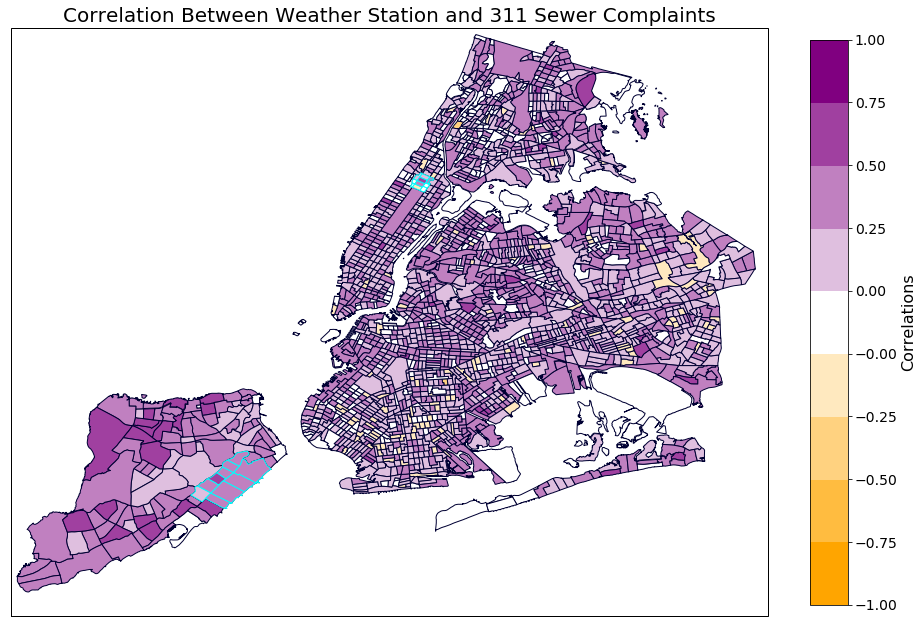

In [122]:
Staten_island1=['5011402','5012200','5013400','5011202','5012804'
               ,'5011201','5011401','5009602','5009601','5007000']
central_harlem=['1019000','1020102','1025700','1019702','1020000','1022200',
             '1021600','1018600','1022000','1021800']
custom_map = custom_div_cmap(9, mincol='orange',maxcol='purple')
#cmap=mcm.jet
cmap=custom_map
norm=mcolors.Normalize(vmin=-1,vmax=1)
#bins = np.arange(-1,1.2,.2)
norm = mcolors.BoundaryNorm(bins, cmap.N)
border_color = "#00ffff"

subplot_kw = dict(projection=ccrs.PlateCarree())
fig, ax = plt.subplots(figsize=(15, 15),
                       subplot_kw=subplot_kw)
ax.background_patch.set_visible(False)
#get bounding box for city
#[-73.700272, -74.2590, 40.477399, 40.917577]
ax.set_extent([-73.69, -74.26, 40.477395, 40.92], 
              ccrs.Geodetic())
ax.set_title(f"Correlation Between Weather Station and 311 Sewer Complaints",fontsize=20)
for _, row in sewer1.iterrows():
    if row['rate']<.75:
        color="white"
    else:
        color = cmap(norm(row["correlation"]))
    if row['boro_ct201']in(Staten_island1):
        ax.add_geometries([row['geometry']], subplot_kw['projection'],
                          facecolor=color, edgecolor=border_color,zorder=2)
    if row['boro_ct201']in(central_harlem):
        ax.add_geometries([row['geometry']], subplot_kw['projection'],
                          facecolor=color, edgecolor=border_color,zorder=2)
    else:
        ax.add_geometries([row['geometry']], subplot_kw['projection'],
                          facecolor=color, edgecolor='#000033')    
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm._A = []
cb = fig.colorbar(sm, ax=ax, fraction=.045, pad=.05, aspect=15)
cb.ax.tick_params(labelsize=14)
cb.ax.set_yticks(bins)
cb.set_label("Correlations" , fontsize=16)
#fig.savefig('#navy and red New Correlation Between Weather Station and 311 Sewer Complaints')

In [30]:
Staten_island1=['5011402','5012200','5013400','5011202','5012804'
               ,'5011201','5011401','5009602','5009601','5007000']
central_harlem=['1019000','1020102','1025700','1019702','1020000','1022200',
             '1021600','1018600','1022000','1021800']
custom_map = custom_div_cmap(11, maxcol='#5ab4ac',mincol='#d8b365')
#cmap=mcm.jet
cmap=custom_map
#norm=mcolors.Normalize(vmin=-1,vmax=1)
bins = np.arange(-1,1.25,.25)
norm = mcolors.BoundaryNorm(bins, cmap.N)
subplot_kw = dict(projection=ccrs.PlateCarree())
fig, ax = plt.subplots(figsize=(15, 15),
                       subplot_kw=subplot_kw)
ax.background_patch.set_visible(False)
#get bounding box for city
#[-73.700272, -74.2590, 40.477399, 40.917577]
ax.set_extent([-73.69, -74.26, 40.477395, 40.92], 
              ccrs.Geodetic())
ax.set_title(f"Correlation Between Weather Station and 311 Sewer Complaints",fontsize=20)
for _, row in sewer1.iterrows():
    if row['rate']<.75:
        color="white"
    else:
        color = cmap(norm(row["correlation"]))
    if row['boro_ct201']in(Staten_island1):
        ax.add_geometries([row['geometry']], subplot_kw['projection'],
                          facecolor=color, edgecolor='black',zorder=2)
    if row['boro_ct201']in(central_harlem):
        ax.add_geometries([row['geometry']], subplot_kw['projection'],
                          facecolor=color, edgecolor='black',zorder=2)
    else:
        ax.add_geometries([row['geometry']], subplot_kw['projection'],
                          facecolor=color, edgecolor='lightgrey')
    
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm._A = []
cb = fig.colorbar(sm, ax=ax, fraction=.045, pad=.05, aspect=15)
cb.ax.tick_params(labelsize=14)
cb.set_label("Correlations" , fontsize=16)
fig.show()
#fig.savefig('New Correlation Between Weather Station and 311 Sewer Complaints B')

C:\Users\xuebi\Anaconda3\lib\site-packages\matplotlib\figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


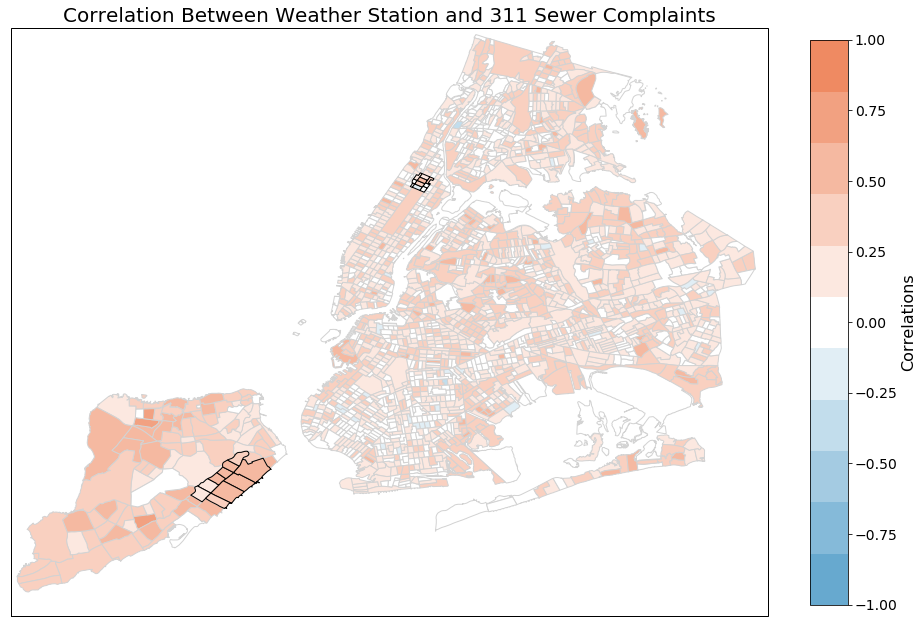

In [138]:
Staten_island1=['5011402','5012200','5013400','5011202','5012804'
               ,'5011201','5011401','5009602','5009601','5007000']
central_harlem=['1019000','1020102','1025700','1019702','1020000','1022200',
             '1021600','1018600','1022000','1021800']
custom_map = custom_div_cmap(11, maxcol='#ef8a62',mincol='#67a9cf')
#cmap=mcm.jet
cmap=custom_map
norm=mcolors.Normalize(vmin=-1,vmax=1)
#bins = np.arange(-1,1.25,.25)
#norm = mcolors.BoundaryNorm(bins, cmap.N)
subplot_kw = dict(projection=ccrs.PlateCarree())
fig, ax = plt.subplots(figsize=(15, 15),
                       subplot_kw=subplot_kw)
ax.background_patch.set_visible(False)
#get bounding box for city
#[-73.700272, -74.2590, 40.477399, 40.917577]
ax.set_extent([-73.69, -74.26, 40.477395, 40.92], 
              ccrs.Geodetic())
ax.set_title(f"Correlation Between Weather Station and 311 Sewer Complaints",fontsize=20)
for _, row in sewer1.iterrows():
    if row['rate']<.75:
        color="white"
    else:
        color = cmap(norm(row["correlation"]))
    if row['boro_ct201']in(Staten_island1):
        ax.add_geometries([row['geometry']], subplot_kw['projection'],
                          facecolor=color, edgecolor='black',zorder=2)
    if row['boro_ct201']in(central_harlem):
        ax.add_geometries([row['geometry']], subplot_kw['projection'],
                          facecolor=color, edgecolor='black',zorder=2)
    else:
        ax.add_geometries([row['geometry']], subplot_kw['projection'],
                          facecolor=color, edgecolor='lightgrey')
    
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm._A = []
cb = fig.colorbar(sm, ax=ax, fraction=.045, pad=.05, aspect=15)
cb.ax.tick_params(labelsize=14)
cb.set_label("Correlations" , fontsize=16)
#fig.savefig('New Correlation Between Weather Station and 311 Sewer Complaints')

In [98]:
import cmocean as cmo

In [69]:
A='a'
B=['a','b','c','d']
A in (B)

True

In [27]:
NewSewer=seasonal_tracts[seasonal_tracts['complaint_type'].str.match("Sewer")].sum()[2:]

In [28]:
NewSewer=pd.Series(NewSewer).to_frame()
NewSewer=NewSewer.rename(columns={0:'Sewer Complaint'})
NewSewer.head()

Sewer Complaint
1000100               0
1000201              50
1000202             155
1000500               0
1000600             231

In [29]:
tracts2=gdf[['boro_ct201','geometry']].merge(NewSewer,
                   left_on='boro_ct201',right_index=True)

In [30]:
tracts2.head()

boro_ct201                                           geometry  \
0    5000900  POLYGON ((-74.07920577013245 40.64343078374567...   
1    1009800  POLYGON ((-73.96432543478758 40.75638153099091...   
2    1010000  POLYGON ((-73.96802436915851 40.75957814005282...   
3    1010200  POLYGON ((-73.97124277307127 40.76093641847906...   
4    1010400  POLYGON ((-73.97445730550224 40.76229308352487...   

  Sewer Complaint  
0             314  
1             621  
2             467  
3             457  
4             312

In [35]:
import numpy as np
cmap=mcm.Greens
#norm=mcolors.Normalize(vmin=tracts2['Sewer Complaint'].min(),vmax=tracts2['Sewer Complaint'].max())
bins = np.arange(0,1500,300)
norm = mcolors.BoundaryNorm(bins, cmap.N)
subplot_kw = dict(projection=ccrs.PlateCarree())
fig, ax = plt.subplots(figsize=(15, 15),
                       subplot_kw=subplot_kw)
ax.background_patch.set_visible(False)
#get bounding box for city
#[-73.700272, -74.2590, 40.477399, 40.917577]
ax.set_extent([-73.69, -74.26, 40.477395, 40.92], 
              ccrs.Geodetic())
ax.set_title(f"Total Sewer Complaint ")
for _, row in tracts2.iterrows():
   
    color = cmap(norm(row["Sewer Complaint"]))
    ax.add_geometries([row['geometry']], subplot_kw['projection'],
                          facecolor=color, edgecolor='grey')
    
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm._A = []
cb = fig.colorbar(sm, ax=ax,extend='max', fraction=.045, pad=.05, aspect=15)
cb.ax.tick_params(labelsize=14)
cb.set_label("# Complaints" , fontsize=16)

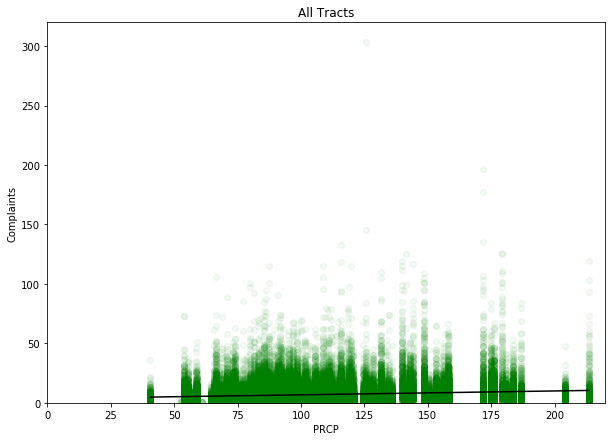

In [40]:
fig,ax=plt.subplots(figsize=(10,7))
imx=[]
imy=[]
for tract in tract_list:
    nearest_st = lut[tract]
    corr_df = sewer[['date', tract]].merge(rain[['date', nearest_st]], 
                                                left_on = "date", right_on="date")
    #corr = corr_df[tract] corr_df[nearest_st]
    #corr[tract] = 
    ax.scatter(corr_df[nearest_st],corr_df[tract],color='g',alpha=0.05)
    imy.extend(corr_df[tract])
    imx.extend(corr_df[nearest_st])
    

d = np.vstack([imx, imy])
not_nan = d[:,~np.isnan(d).any(axis=0)]
myx, myy = not_nan    
slope, intercept, r_value, p_value, std_err = st.linregress(myx, myy)
theory_x = np.linspace(myx.min(), myx.max(), 100)
predicted_y = slope*theory_x +intercept
ax.plot(theory_x, predicted_y, color="black")    
    
ax.set(xlabel='PRCP',ylabel='Complaints',title='All Tracts')
ax.set_xlim(0,220)
ax.set_ylim(0,320)
fig.savefig('All Sewer Tract')

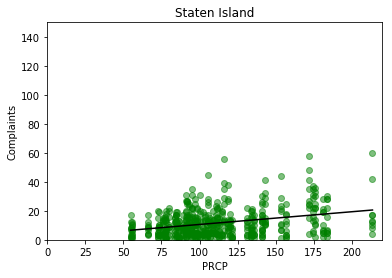

In [41]:
Staten_island=['5000900','5011402','5017009','5025100','5014607','5017010','5032300','5000300','5027702','5014700']
fig,ax=plt.subplots()
imx=[]
imy=[]
for tract in Staten_island:
    nearest_st = lut[tract]
    corr_df = sewer[['date', tract]].merge(rain[['date', nearest_st]], 
                                                left_on = "date", right_on="date")
    #corr = corr_df[tract] corr_df[nearest_st]
    #corr[tract] = 
    #H=corr_df[corr_df[tract]>22.5]
    ax.scatter(corr_df[nearest_st],corr_df[tract],color='g',alpha=0.5)
    imy.extend(corr_df[tract])
    imx.extend(corr_df[nearest_st])
    

d = np.vstack([imx, imy])
not_nan = d[:,~np.isnan(d).any(axis=0)]
myx, myy = not_nan    
slope, intercept, r_value, p_value, std_err = st.linregress(myx, myy)
theory_x = np.linspace(myx.min(), myx.max(), 100)
predicted_y = slope*theory_x +intercept
ax.plot(theory_x, predicted_y, color="black")    
    
ax.set(xlabel='PRCP',ylabel='Complaints',title='Staten Island')
ax.set_xlim(0,220)
ax.set_ylim(0, 150)
fig.savefig('Sewer Staten Island')

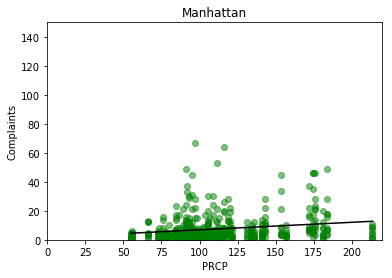

In [42]:
manhatten=['1011600','1016700','1013200','1010300',
           '1011000','1022900','1003300','1002100',
           '1002201','1018800']
fig,ax=plt.subplots()
imx=[]
imy=[]
for tract in manhatten:
    nearest_st = lut[tract]
    corr_df = sewer[['date', tract]].merge(rain[['date', nearest_st]], 
                                                left_on = "date", right_on="date")
    #corr = corr_df[tract] corr_df[nearest_st]
    #corr[tract] = 
    #H=corr_df[corr_df[tract]>22.5]
    ax.scatter(corr_df[nearest_st],corr_df[tract],color='g',alpha=0.5)
    imy.extend(corr_df[tract])
    imx.extend(corr_df[nearest_st])
    

d = np.vstack([imx, imy])
not_nan = d[:,~np.isnan(d).any(axis=0)]
myx, myy = not_nan    
slope, intercept, r_value, p_value, std_err = st.linregress(myx, myy)
theory_x = np.linspace(myx.min(), myx.max(), 100)
predicted_y = slope*theory_x +intercept
ax.plot(theory_x, predicted_y, color="black")    
    
ax.set(xlabel='PRCP',ylabel='Complaints',title='Manhattan')
ax.set_xlim(0,220)
ax.set_ylim(0,150)
fig.savefig('Sewer Manhattan')

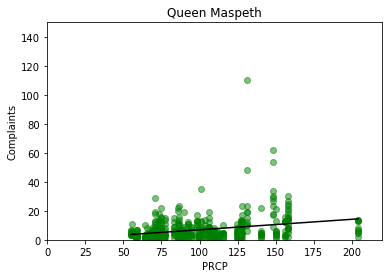

In [43]:
queen_maspeth=['4049500','4052500','4059900','4051300',
            '4060100','4051500','4053500','4049700','4053100','4049302']
fig,ax=plt.subplots()
imx=[]
imy=[]
for tract in queen_maspeth:
    nearest_st = lut[tract]
    corr_df = sewer[['date', tract]].merge(rain[['date', nearest_st]], 
                                                left_on = "date", right_on="date")
    #corr = corr_df[tract] corr_df[nearest_st]
    #corr[tract] = 
    #H=corr_df[corr_df[tract]>22.5]
    ax.scatter(corr_df[nearest_st],corr_df[tract],color='g',alpha=0.5)
    imy.extend(corr_df[tract])
    imx.extend(corr_df[nearest_st])
    

d = np.vstack([imx, imy])
not_nan = d[:,~np.isnan(d).any(axis=0)]
myx, myy = not_nan    
slope, intercept, r_value, p_value, std_err = st.linregress(myx, myy)
theory_x = np.linspace(myx.min(), myx.max(), 100)
predicted_y = slope*theory_x +intercept
ax.plot(theory_x, predicted_y, color="black")    
    
ax.set(xlabel='PRCP',ylabel='Complaints',title='Queen Maspeth')
ax.set_xlim(0,220)
ax.set_ylim(0,150)
fig.savefig('Sewer Queen Island')

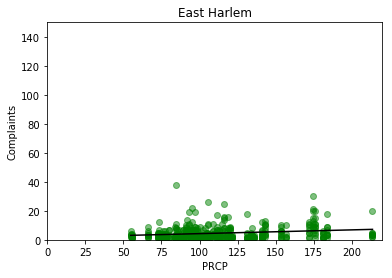

In [44]:
east_harlem=['1018400','1019800','1019600','1019400','1018000','1018200',
             '1017800','1018800','1021000','1019200']
fig,ax=plt.subplots()
imx=[]
imy=[]
for tract in east_harlem:
    nearest_st = lut[tract]
    corr_df = sewer[['date', tract]].merge(rain[['date', nearest_st]], 
                                                left_on = "date", right_on="date")
    #corr = corr_df[tract] corr_df[nearest_st]
    #corr[tract] = 
    #H=corr_df[corr_df[tract]>22.5]
    ax.scatter(corr_df[nearest_st],corr_df[tract],color='g',alpha=0.5)
    imy.extend(corr_df[tract])
    imx.extend(corr_df[nearest_st])
    

d = np.vstack([imx, imy])
not_nan = d[:,~np.isnan(d).any(axis=0)]
myx, myy = not_nan    
slope, intercept, r_value, p_value, std_err = st.linregress(myx, myy)
theory_x = np.linspace(myx.min(), myx.max(), 100)
predicted_y = slope*theory_x +intercept
ax.plot(theory_x, predicted_y, color="black")    
    
ax.set(xlabel='PRCP',ylabel='Complaints',title='East Harlem')
ax.set_xlim(0,220)
ax.set_ylim(0, 150)
fig.savefig('Sewer East Harlem')

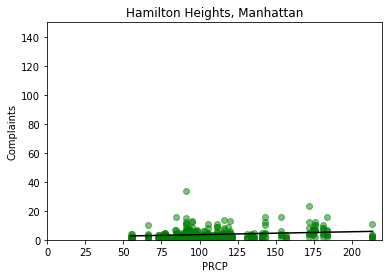

In [51]:
manhatten1=['1022500','1022700','1022900','1023300',
           '1023700','1023100','1023501']
fig,ax=plt.subplots()
imx=[]
imy=[]
for tract in manhatten1:
    nearest_st = lut[tract]
    corr_df = sewer[['date', tract]].merge(rain[['date', nearest_st]], 
                                                left_on = "date", right_on="date")
    #corr = corr_df[tract] corr_df[nearest_st]
    #corr[tract] = 
    #H=corr_df[corr_df[tract]>22.5]
    ax.scatter(corr_df[nearest_st],corr_df[tract],color='g',alpha=0.5)
    imy.extend(corr_df[tract])
    imx.extend(corr_df[nearest_st])
    

d = np.vstack([imx, imy])
not_nan = d[:,~np.isnan(d).any(axis=0)]
myx, myy = not_nan    
slope, intercept, r_value, p_value, std_err = st.linregress(myx, myy)
theory_x = np.linspace(myx.min(), myx.max(), 100)
predicted_y = slope*theory_x +intercept
ax.plot(theory_x, predicted_y, color="black")    
    
ax.set(xlabel='PRCP',ylabel='Complaints',title='Hamilton Heights, Manhattan')
ax.set_xlim(0,220)
ax.set_ylim(0,150)
fig.savefig('Sewer Hamilton Heights, Manhattan')

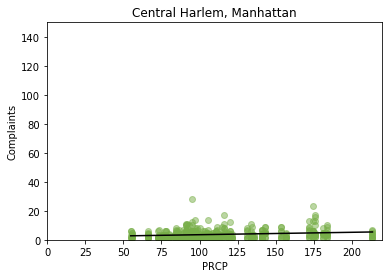

In [98]:
central_harlem=['1019000','1020102','1025700','1019702','1020000','1022200',
             '1021600','1018600','1022000','1021800']
fig,ax=plt.subplots()
imx=[]
imy=[]
for tract in central_harlem:
    nearest_st = lut[tract]
    corr_df = sewer[['date', tract]].merge(rain[['date', nearest_st]], 
                                                left_on = "date", right_on="date")
    #corr = corr_df[tract] corr_df[nearest_st]
    #corr[tract] = 
    #H=corr_df[corr_df[tract]>22.5]
    ax.scatter(corr_df[nearest_st],corr_df[tract],color='#78AF49',alpha=0.5)
    imy.extend(corr_df[tract])
    imx.extend(corr_df[nearest_st])
    

d = np.vstack([imx, imy])
not_nan = d[:,~np.isnan(d).any(axis=0)]
myx, myy = not_nan    
slope, intercept, r_value, p_value, std_err = st.linregress(myx, myy)
theory_x = np.linspace(myx.min(), myx.max(), 100)
predicted_y = slope*theory_x +intercept
ax.plot(theory_x, predicted_y, color="black")    
    
ax.set(xlabel='PRCP',ylabel='Complaints',title='Central Harlem, Manhattan')
ax.set_xlim(0,220)
ax.set_ylim(0, 150)
fig.savefig('Sewer Central Harlem')

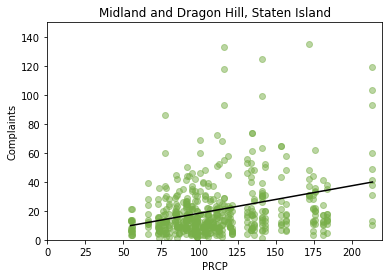

In [97]:
Staten_island1=['5011402','5012200','5013400','5011202','5012804'
               ,'5011201','5011401','5009602','5009601','5007000']
#midland beach,dragon hill
fig,ax=plt.subplots()
imx=[]
imy=[]
for tract in Staten_island1:
    nearest_st = lut[tract]
    corr_df = sewer[['date', tract]].merge(rain[['date', nearest_st]], 
                                                left_on = "date", right_on="date")
    #corr = corr_df[tract] corr_df[nearest_st]
    #corr[tract] = 
    #H=corr_df[corr_df[tract]>22.5]
    ax.scatter(corr_df[nearest_st],corr_df[tract],color='#78AF49',alpha=0.5)
    imy.extend(corr_df[tract])
    imx.extend(corr_df[nearest_st])
    

d = np.vstack([imx, imy])
not_nan = d[:,~np.isnan(d).any(axis=0)]
myx, myy = not_nan    
slope, intercept, r_value, p_value, std_err = st.linregress(myx, myy)
theory_x = np.linspace(myx.min(), myx.max(), 100)
predicted_y = slope*theory_x +intercept
ax.plot(theory_x, predicted_y, color="black")    
    
ax.set(xlabel='PRCP',ylabel='Complaints',title='Midland and Dragon Hill, Staten Island')
ax.set_xlim(0,220)
ax.set_ylim(0, 150)
fig.savefig('Sewer Midland and Dragon Hill, Staten Island')